<a href="https://colab.research.google.com/github/Echo271/Capstone-Project-Gasturah/blob/main/Model_Gasturah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 64)      

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/Dataset Gasturah/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Dataset Gasturah/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(100,100),
	class_mode='categorical',
  batch_size=126
)

Found 1490 images belonging to 10 classes.
Found 376 images belonging to 10 classes.


In [ ]:
# Train the model
history = model.fit(train_generator, epochs=20, steps_per_epoch=15, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/15
10/10 [==============================] - 33s 3s/step - loss: 2.3319 - accuracy: 0.1664 - val_loss: 2.2143 - val_accuracy: 0.1729
Epoch 2/15
10/10 [==============================] - 32s 3s/step - loss: 2.1695 - accuracy: 0.2278 - val_loss: 2.1020 - val_accuracy: 0.2553
Epoch 3/15
10/10 [==============================] - 32s 3s/step - loss: 2.0737 - accuracy: 0.2488 - val_loss: 1.9847 - val_accuracy: 0.2686
Epoch 4/15
10/10 [==============================] - 31s 3s/step - loss: 1.9433 - accuracy: 0.2787 - val_loss: 1.9030 - val_accuracy: 0.2926
Epoch 5/15
10/10 [==============================] - 31s 3s/step - loss: 1.9180 - accuracy: 0.3183 - val_loss: 2.0304 - val_accuracy: 0.3005
Epoch 6/15
10/10 [==============================] - 31s 3s/step - loss: 1.8755 - accuracy: 0.3360 - val_loss: 1.8947 - val_accuracy: 0.3404
Epoch 7/15
10/10 [==============================] - 31s 3s/step - loss: 1.8258 - accuracy: 0.3449 - val_loss: 1.8157 - val_accuracy: 0.3830
Epoch 8/15
10/10 [==

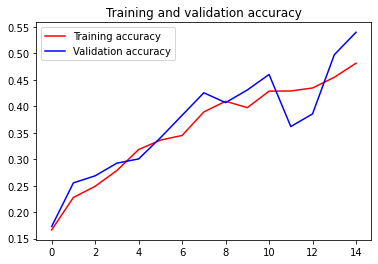

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()